In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt

import numpy as np

d:\python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.set_random_seed(1)

np.random.seed(1)

In [7]:
# fake data

x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)

noise = np.random.normal(0, 0.1, size=x.shape)

y = np.power(x, 2) + noise                          # shape (100, 1) + some noise

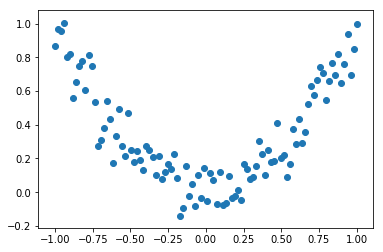

In [8]:
# plot data

plt.scatter(x, y)

plt.show()

In [9]:
tf_x = tf.placeholder(tf.float32, x.shape)     # input x

tf_y = tf.placeholder(tf.float32, y.shape)     # input y



# neural network layers

l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer

output = tf.layers.dense(l1, 1)                     # output layer



loss = tf.losses.mean_squared_error(tf_y, output)   # compute cost

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

train_op = optimizer.minimize(loss)

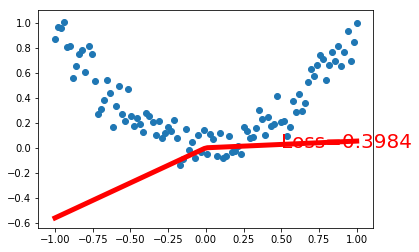

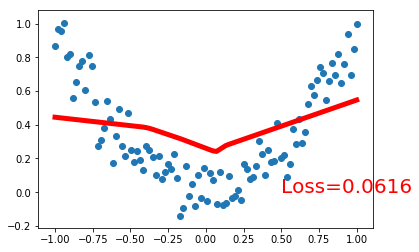

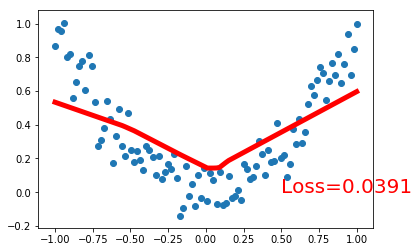

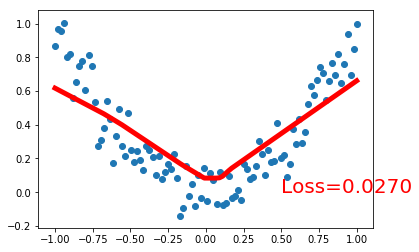

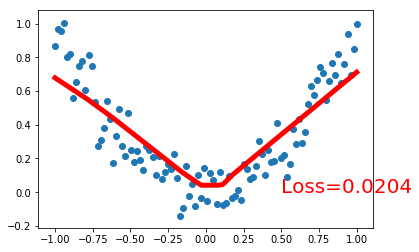

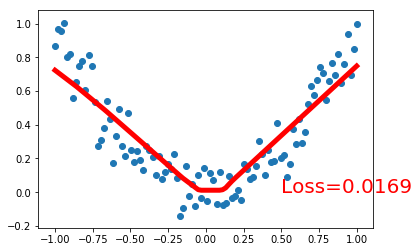

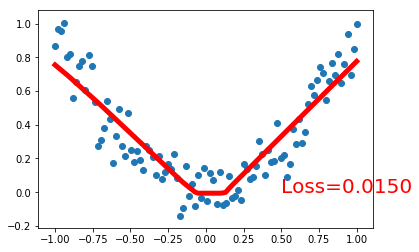

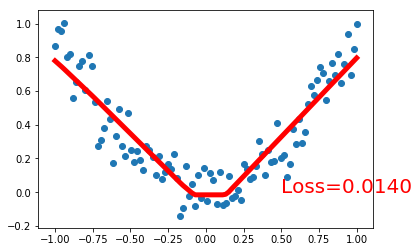

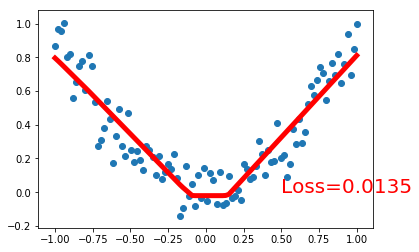

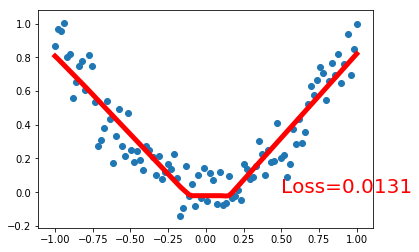

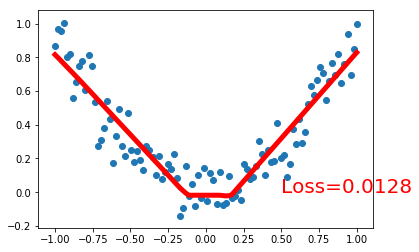

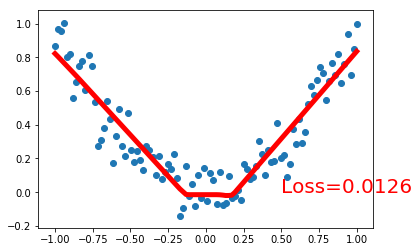

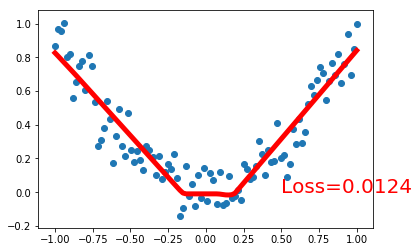

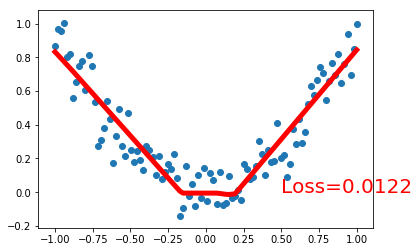

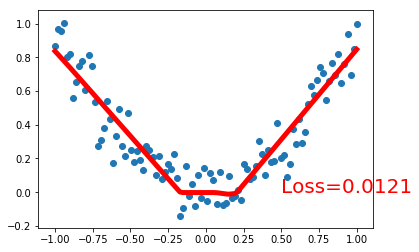

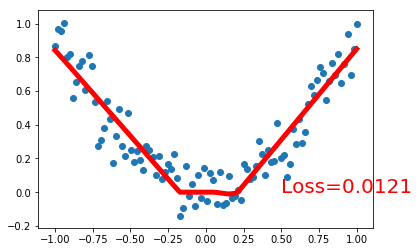

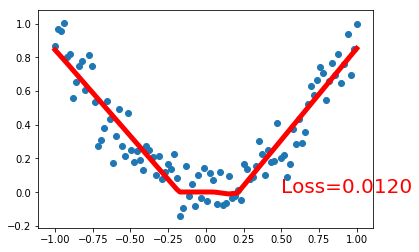

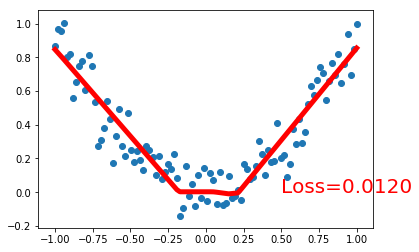

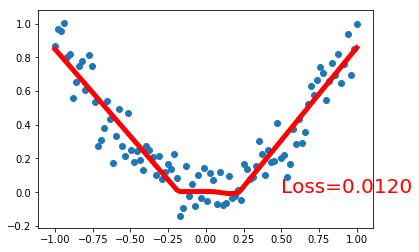

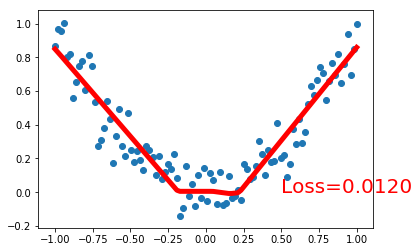

In [12]:
sess = tf.Session()                                 # control training and others

sess.run(tf.global_variables_initializer())         # initialize var in graph



plt.ion()   # something about plotting



for step in range(100):

    # train and net output

    _, l, pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y})

    if step % 5 == 0:

        # plot and show learning process

        plt.cla()

        plt.scatter(x, y)

        plt.plot(x, pred, 'r-', lw=5)

        plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})

        plt.pause(0.1)



plt.ioff()

plt.show()